In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

In [3]:
X = np.array([ [1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

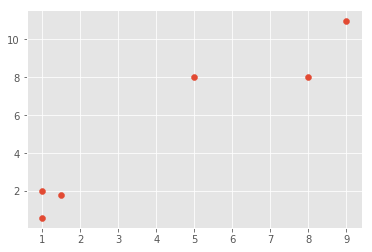

In [6]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [7]:
colors = 10*['g', 'r', 'c', 'b', 'k']

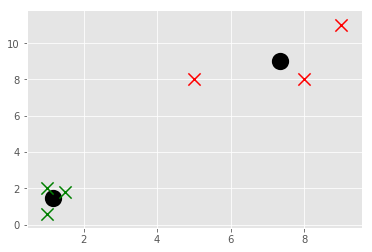

In [19]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self, data):
#         print('data is', data)
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
        
#         print('centroids are', self.centroids)
        
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
            
#             print('classifications are', self.classifications)
            
            for featureset in X:
#                 print('featureset', featureset)
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
#                 print('distances are', distances)
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
#                 print('before average', classification, np.average(self.classifications[classification]))
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break
                
    def predict(self, data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

    
clf = K_Means()
clf.fit(X)   

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker="o", color="k", s=150, linewidth=5)
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
    

In [20]:
unknowns = np.array([[1, 3], [8, 9], [0, 3], [5, 4], [6, 4],])

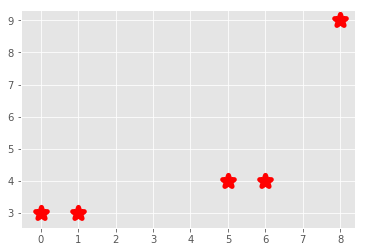

In [23]:
for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker='*', color=colors[classification],s=150,linewidths=5)
plt.show()